In [1]:
# Most cases by TYPE
# Most cases by LOCATION
# Most cases by Season
# Seasons when more cases are resolved
# Time taken to resolve cases
# Correlate TYPE and LOCATION

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Read data from csv
pre_covid_records = pd.read_csv('data\\311_Cases_2015_2019_Unrestricted.csv')
post_covid_records = pd.read_csv('data\\311_Cases_2020_2024_Unrestricted.csv')

# print(pre_covid_records.columns)
# ['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION',
#        'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y',
#        'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
#        'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI',
#        'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']

In [4]:
def parse_date(dateStr: str):
    return dt.datetime.strptime(dateStr, '%Y-%m-%d')

In [5]:
pre_covid_records['OPEN_DT'] = pd.to_datetime(pre_covid_records['OPEN_DT'])
pre_covid_records['CLOSED_DT'] = pd.to_datetime(pre_covid_records['CLOSED_DT'])
#pre_covid_records.dtypes

post_covid_records['OPEN_DT'] = pd.to_datetime(post_covid_records['OPEN_DT'])
post_covid_records['CLOSED_DT'] = pd.to_datetime(post_covid_records['CLOSED_DT'])
#post_covid_records.dtypes

In [6]:
def resolution_time(df):
    df['RESOLUTION_TIME'] = (df['CLOSED_DT'] - df['OPEN_DT']).dt.days
    return df

In [7]:
resolution_time(pre_covid_records)[['TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'RESOLUTION_TIME']]

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,RESOLUTION_TIME
0,Animal Found,101001240881,NaT,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,NaN
1,Animal Found,101001240807,NaT,"27 Shepard St, Brighton, MA 02135",2015-01-01,NaN
2,Animal Found,101001240873,NaT,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,NaN
3,Animal Found,101001240750,NaT,"730 Adams St, Dorchester, MA 02122",2015-01-01,NaN
4,Animal Found,101001240740,NaT,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,NaN
...,...,...,...,...,...,...
1419946,Unsatisfactory Living Conditions,101003147591,2020-01-02,"333 Massachusetts Ave, Boston, MA 02115",2019-12-31,2.0
1419947,Unsatisfactory Living Conditions,101003147797,NaT,"174 W Eighth St, South Boston, MA 02127",2019-12-31,NaN
1419948,Unshoveled Sidewalk,101003147996,2019-12-31,"560 Boylston St, Boston, MA 02116",2019-12-31,0.0
1419949,Utility Casting Repair,101003147474,NaT,"567-569 Bennington St, East Boston, MA 02128",2019-12-31,NaN


In [8]:
resolution_time(post_covid_records)[['TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'RESOLUTION_TIME']]

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,RESOLUTION_TIME
0,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,12.0
1,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,71.0
2,Abandoned Vehicles,101003148579,2020-01-02,"8 Montana St, Dorchester, MA 02121",2020-01-01,1.0
3,Abandoned Vehicles,101003148438,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,1.0
4,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,1.0
...,...,...,...,...,...,...
303130,"Unsatisfactory Utilities - Electrical, Plumbing",101003578428,NaT,"20 Thorn St, Mattapan, MA 02126",2020-12-31,NaN
303131,Unshoveled Sidewalk,101003578654,2020-12-31,"INTERSECTION of Farmington Rd & Manthorne Rd, ...",2020-12-31,0.0
303132,Work Hours-Loud Noise Complaints,101003578193,2021-01-08,"1091 Boylston St, Boston, MA 02215",2020-12-31,8.0
303133,Work Hours-Loud Noise Complaints,101003578194,2021-01-07,INTERSECTION of Boylston St & Massachusetts Tp...,2020-12-31,7.0


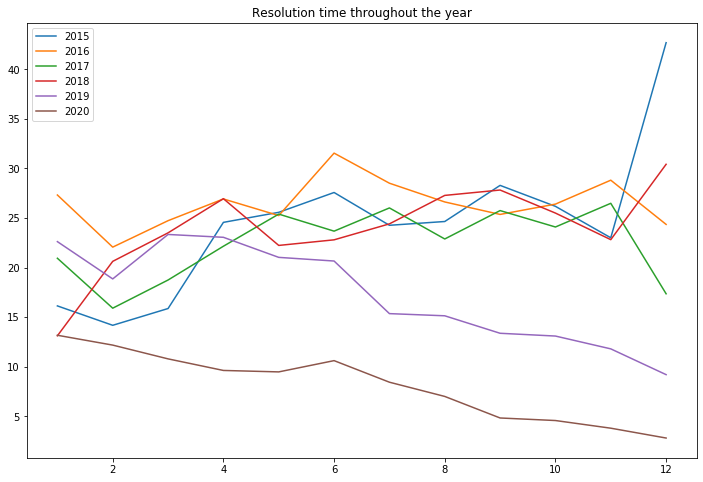

In [9]:
years = pre_covid_records['OPEN_DT'].dt.year.unique()
records_by_year = {}
for year in years: 
    records_by_year[year] = pre_covid_records[pre_covid_records['OPEN_DT'].dt.year == year]
    
for year in post_covid_records['OPEN_DT'].dt.year.unique():
    records_by_year[year] = post_covid_records[post_covid_records['OPEN_DT'].dt.year == year]
    
plt.figure(figsize=(12,8))
for year, records in records_by_year.items():
    x = range(1, 13)
    y = [records[records['OPEN_DT'].dt.month == month]['RESOLUTION_TIME'].mean(skipna=True) for month in x]
    plt.plot(x, y, label=year)
    
plt.legend()
plt.title('Resolution time throughout the year')
plt.show()

#### Hypothesis 1 
We can observe from the above graph that the resolution time in 2020 is less than the resolution time in previous years and hence the Hypothesis that the resolution time increased during peak covid period went down is false.   

In [10]:
def group_and_count(df, groupingColumn):
    df = df.groupby(groupingColumn)['CASE_ENQUIRY_ID'].nunique().reset_index(name='COUNT') \
        .sort_values(['COUNT'], ascending = False)
    df['Percentage'] = df['COUNT'] / df['COUNT'].sum() * 100
    return df

In [11]:
# Count each type of request and arrange them in decreasing order
pre_covid_type = group_and_count(pre_covid_records, 'TYPE')
print("Top 10 most common requests during 2015-2019")
top_10_types_pre_covid = pre_covid_type.head(10)
top_10_types_pre_covid

Top 10 most common requests during 2015-2019


,TYPE,COUNT,Percentage
59,General Request,175288,12.344651
127,Parking Enforcement,152303,10.725934
160,Requests for Street Cleaning,83461,5.877738
97,Missed Trash/Recycling/Yard Waste/Bulk Item,65984,4.646921
155,Request for Pothole Repair,59999,4.225427
167,Schedule a Bulk Item Pickup,57681,4.062182
80,Improper Storage of Trash (Barrels),52812,3.719283
157,Request for Snow Plowing,41207,2.902002
25,CE Collection,37325,2.628612
187,Street Light Outages,36854,2.595442


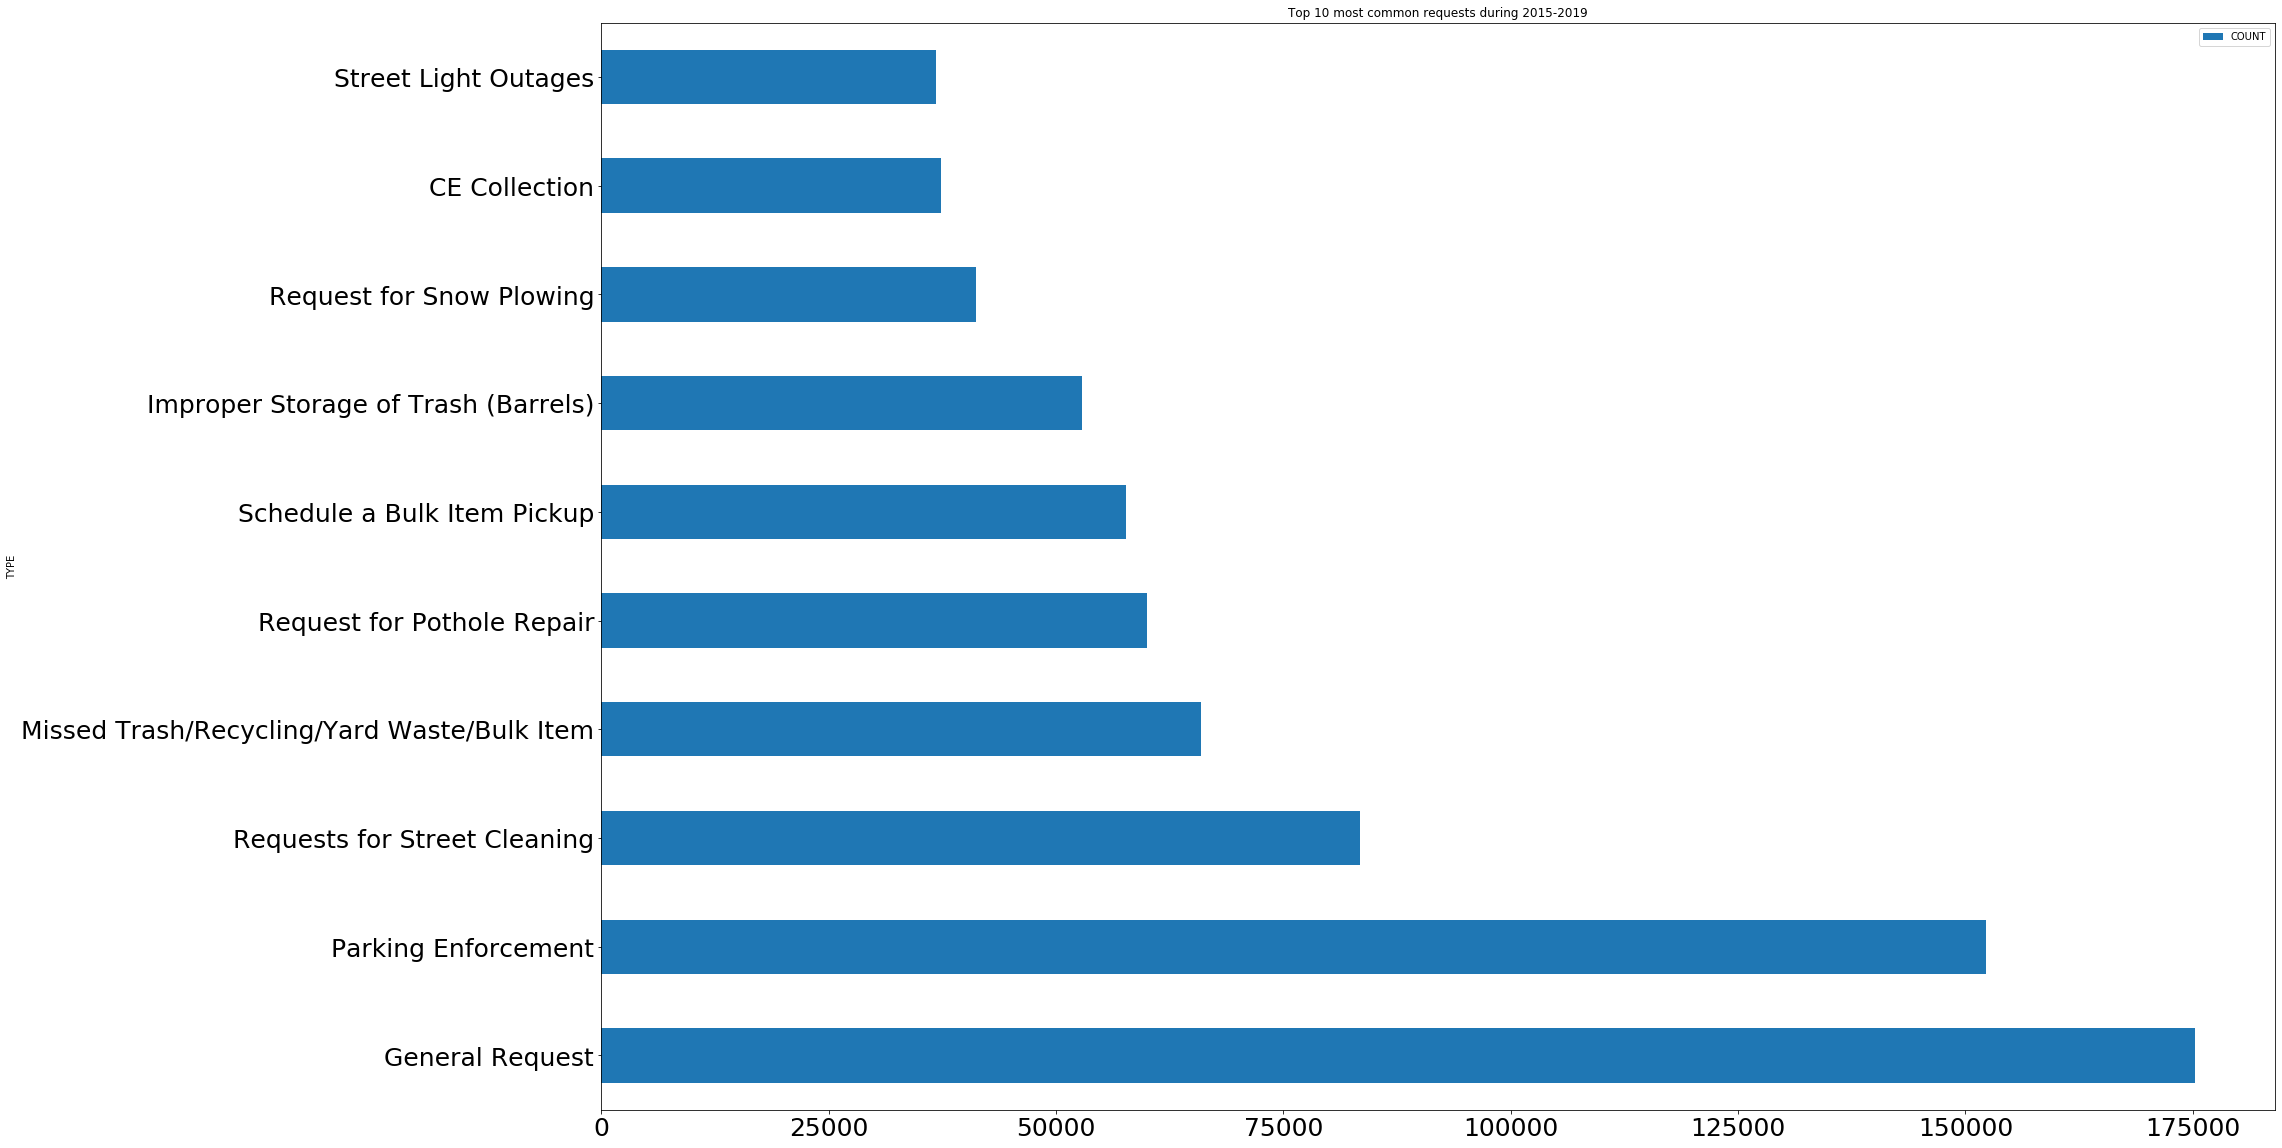

In [12]:
top_10_plot_pre_covid = top_10_types_pre_covid.plot.barh(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 most common requests during 2015-2019")

In [13]:
post_covid_type = group_and_count(post_covid_records, 'TYPE')
print("\nTop 10 most common requests during 2020-2021")
top_10_types_post_covid = post_covid_type.head(10)
top_10_types_post_covid


Top 10 most common requests during 2020-2021


,TYPE,COUNT,Percentage
48,General Request,51047,16.839692
102,Parking Enforcement,38263,12.622429
133,Requests for Street Cleaning,18129,5.980504
82,Needle Pickup,14107,4.653702
140,Schedule a Bulk Item Pickup,13525,4.461708
64,Improper Storage of Trash (Barrels),11947,3.941148
78,Missed Trash/Recycling/Yard Waste/Bulk Item,11650,3.843172
128,Request for Pothole Repair,9460,3.120722
22,CE Collection,9146,3.017138
129,Request for Recycling Cart,8171,2.695499


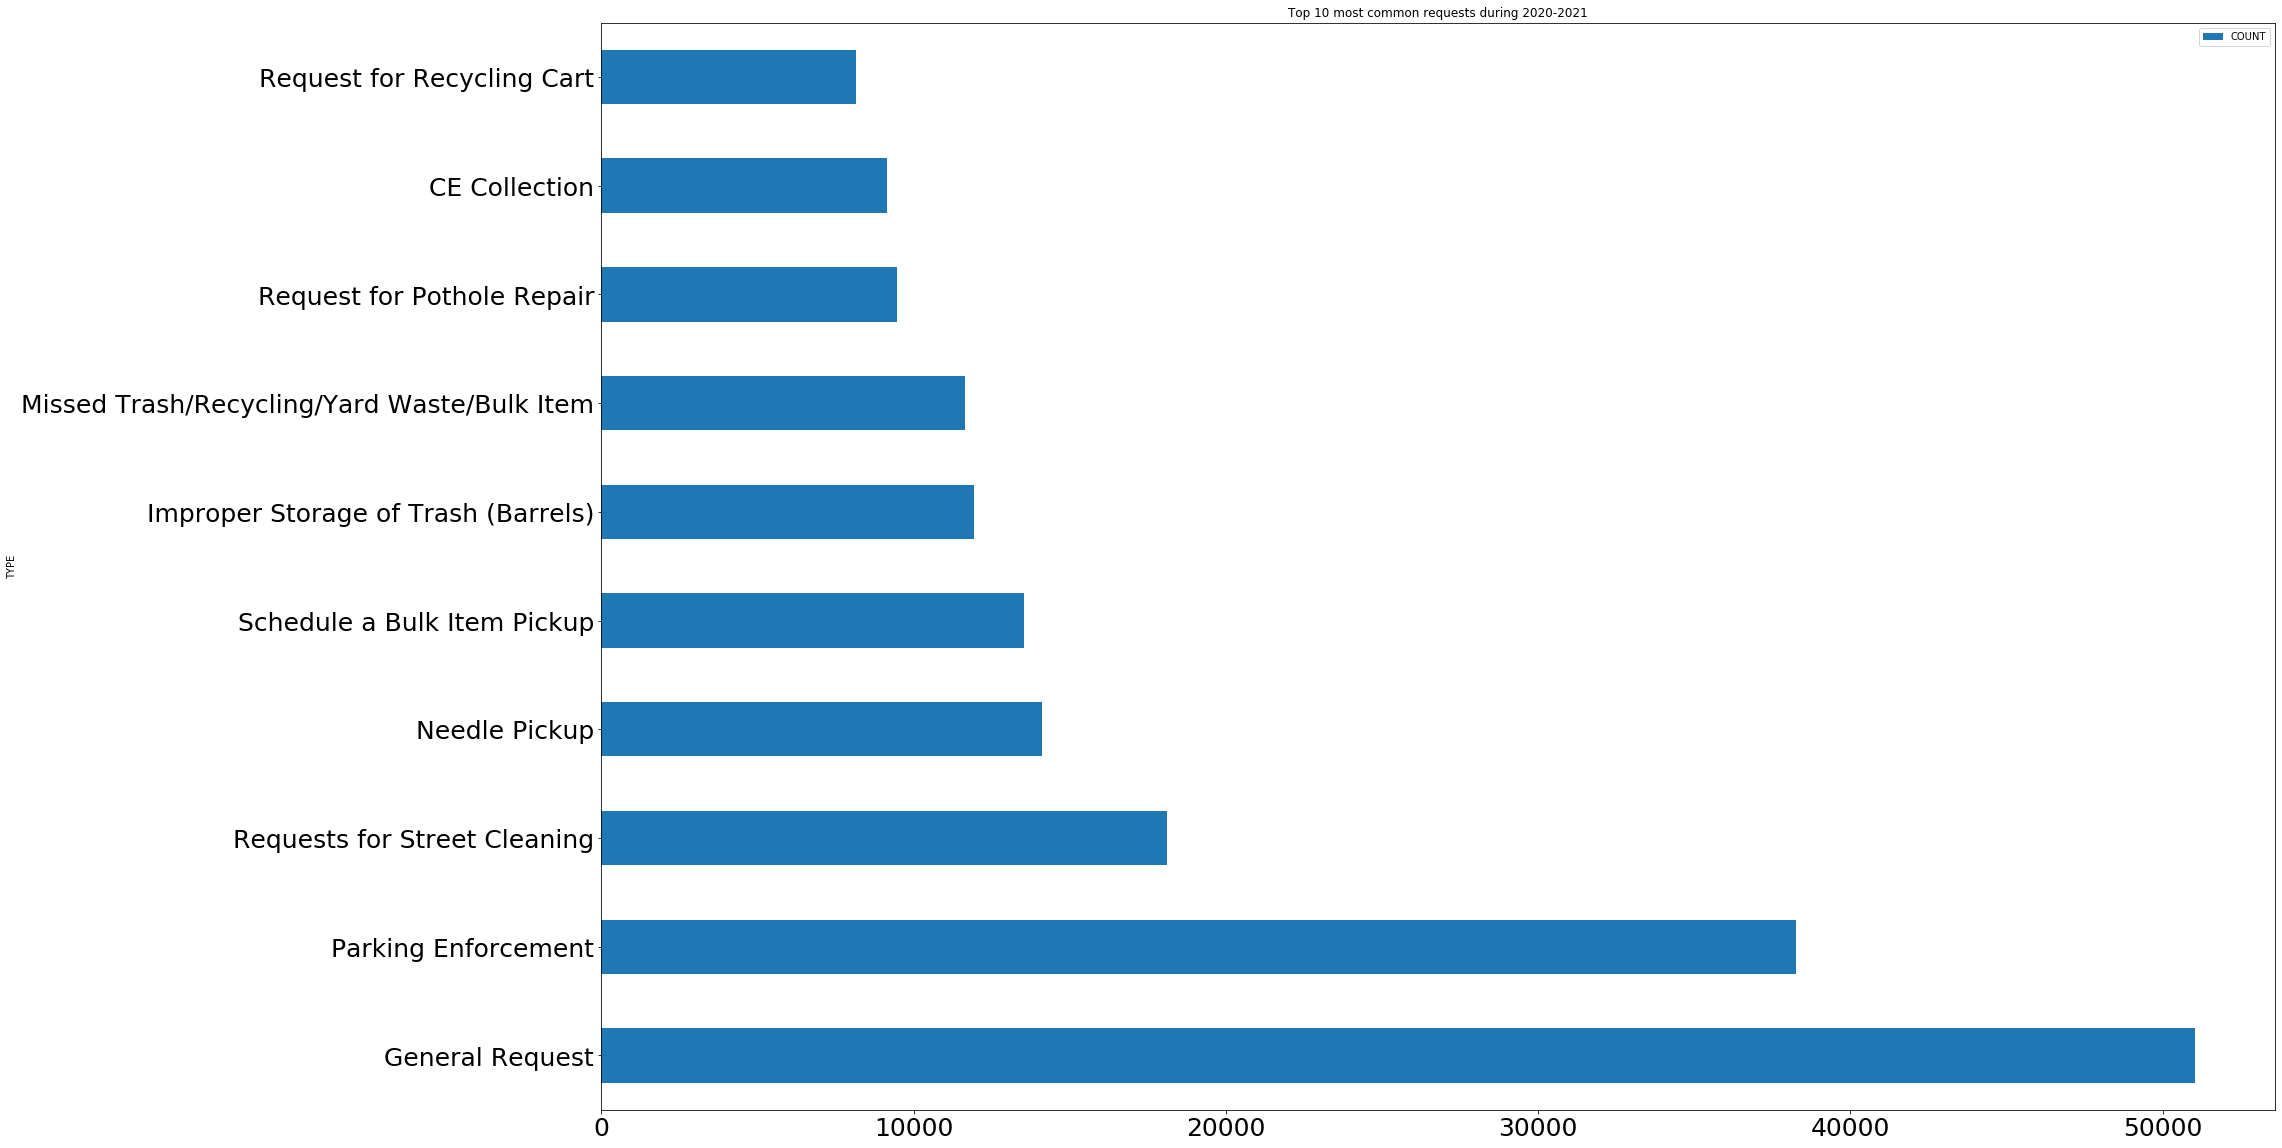

In [14]:
top_10_plot_post_covid = top_10_types_post_covid.plot.barh(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 most common requests during 2020-2021")

In [16]:
pre_covid_location = group_and_count(pre_covid_records, 'LOCATION')
print("Top 10 locations with highest number of complaints during 2015-2019")
top_10_locations_pre_covid = pre_covid_location.head(10)
top_10_locations_pre_covid

Top 10 locations with highest number of complaints during 2015-2019


,LOCATION,COUNT,Percentage
783,"1 City Hall Plz, Boston, MA 02108",4792,0.348709
3763,"100 City Hall Plz, Boston, MA 02108",1376,0.100130
124146,"INTERSECTION of Cross St & Hanover St, Boston,...",585,0.042570
128420,INTERSECTION of Massachusetts Ave & Melnea Cas...,569,0.041406
128415,INTERSECTION of Massachusetts Ave & Huntington...,494,0.035948
122022,"INTERSECTION of Boylston St & Park Dr, Boston,...",466,0.033910
106112,"75 W Rutland Sq, Roxbury, MA 02118",443,0.032237
18094,"139 Tremont St, Boston, MA 02108",421,0.030636
24222,"1530 Washington St, Roxbury, MA 02118",410,0.029835
24241,"1535 Washington St, Roxbury, MA 02118",408,0.029690


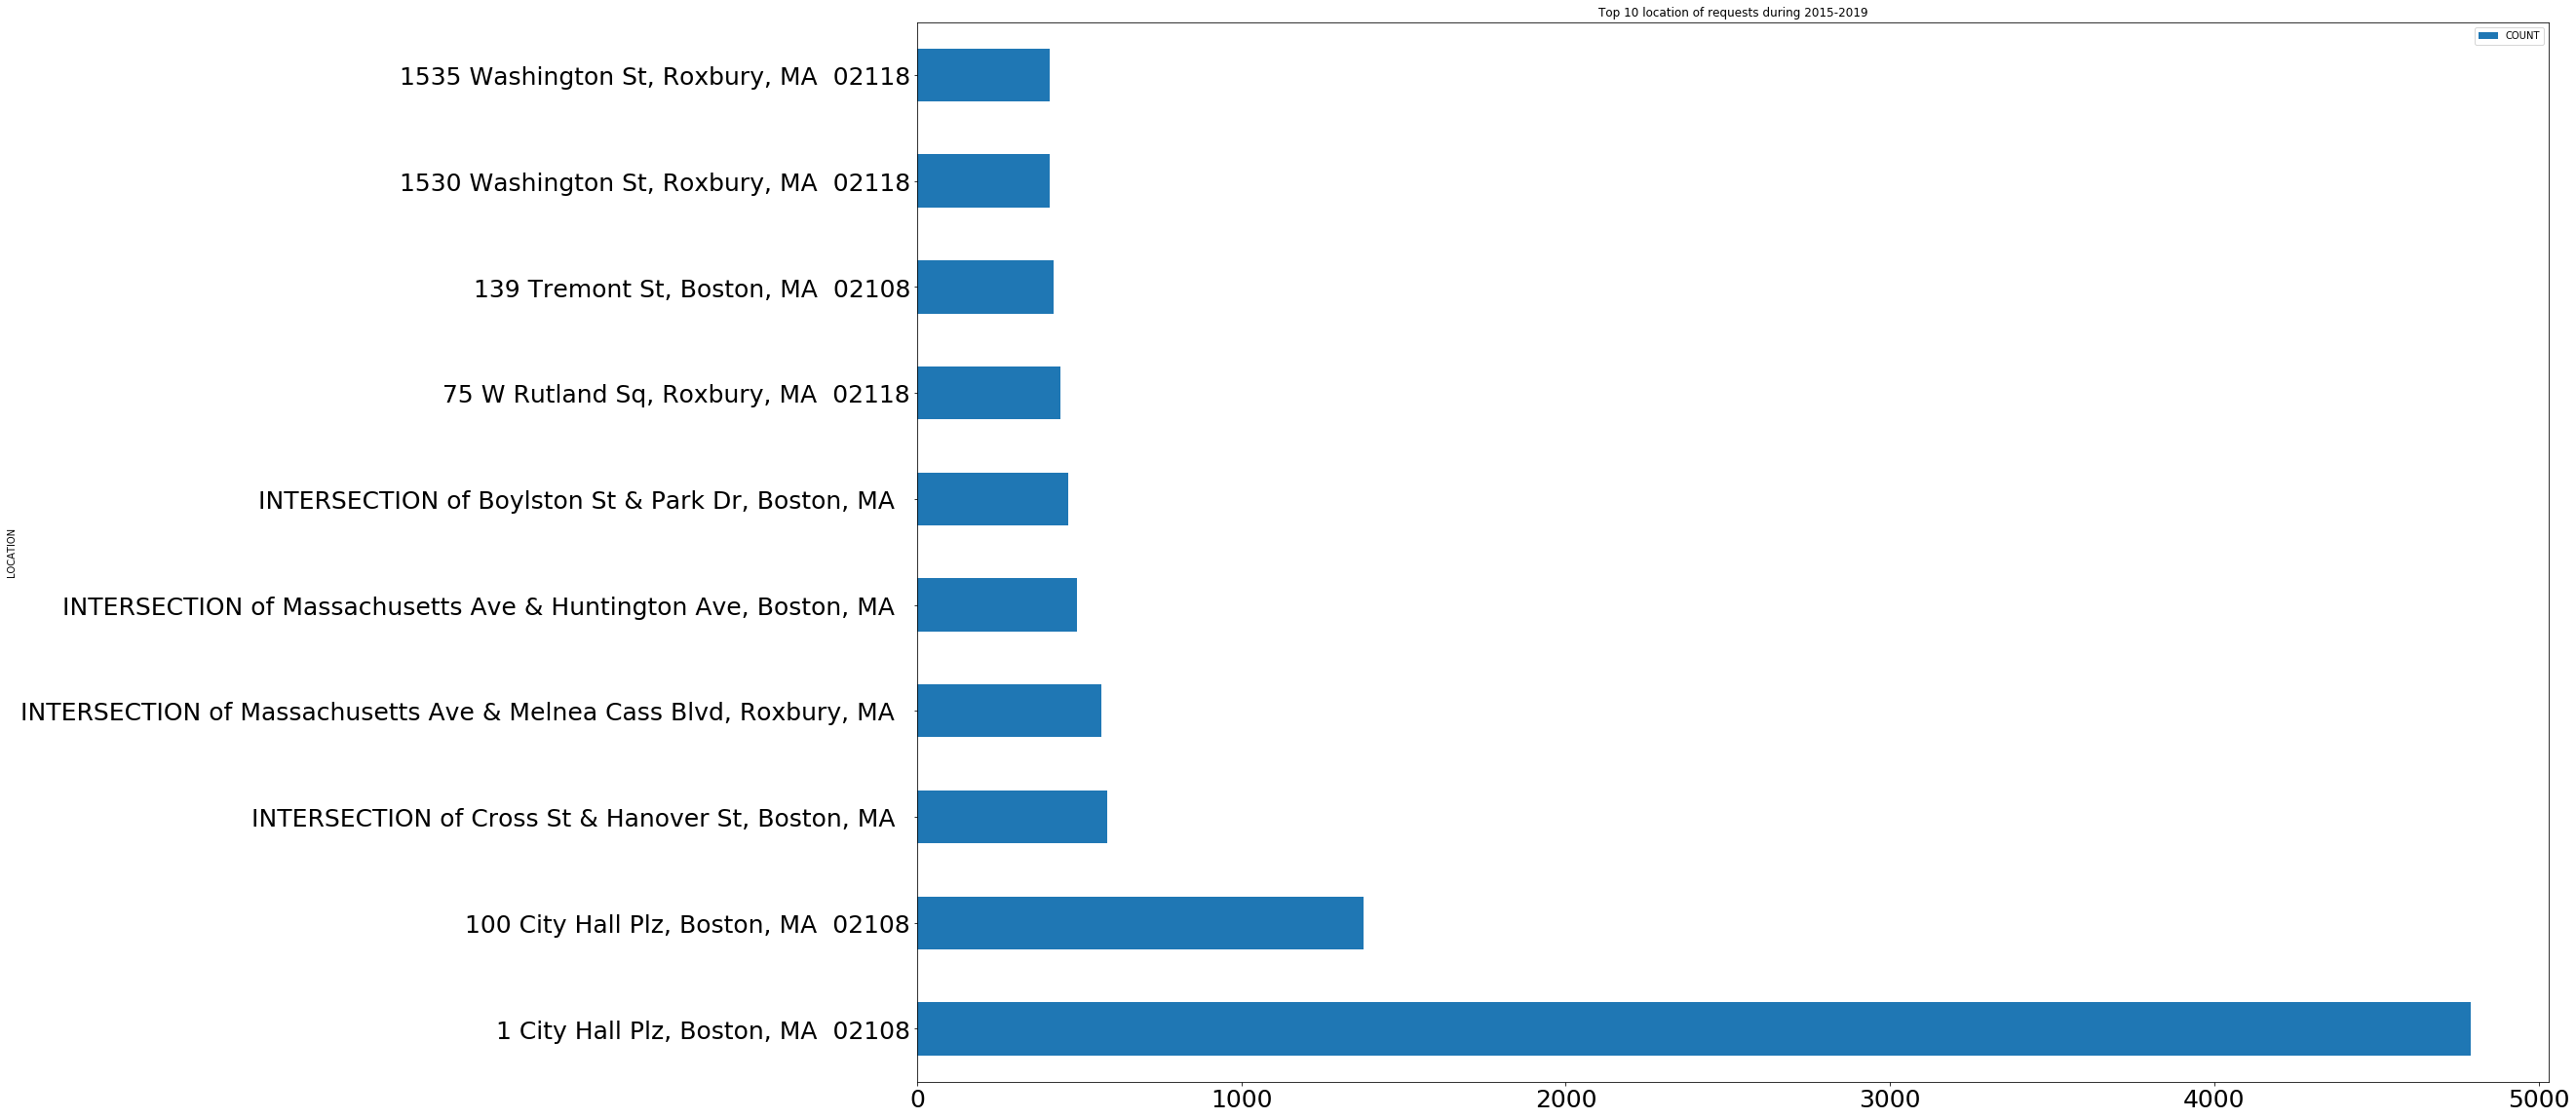

In [17]:
top_10_plot_post_covid = top_10_locations_pre_covid.plot.barh(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 location of requests during 2015-2019")

In [18]:
post_covid_location = group_and_count(post_covid_records, 'LOCATION')
print("\nTop 10 locations with highest number of complaints during 2020-2021")
top_10_locations_post_covid = post_covid_location.head(10)
top_10_locations_post_covid


Top 10 locations with highest number of complaints during 2020-2021


,LOCATION,COUNT,Percentage
133,"1 City Hall Plz, Boston, MA 02108",1533,0.513050
1925,"100 City Hall Plz, Boston, MA 02108",339,0.113453
16105,"160 Southampton St, Roxbury, MA 02118",226,0.075636
65056,"75 W Rutland Sq, Roxbury, MA 02118",204,0.068273
54121,"544P Massachusetts Ave, Roxbury, MA 02118",198,0.066265
14506,"1535 Washington St, Roxbury, MA 02118",197,0.065930
75320,"INTERSECTION of Chandler St & Cazenove St, Bos...",190,0.063587
75515,"INTERSECTION of Claremont St & Wellington St, ...",147,0.049197
78605,INTERSECTION of Massachusetts Ave & Melnea Cas...,143,0.047858
14495,"1530 Washington St, Roxbury, MA 02118",140,0.046854


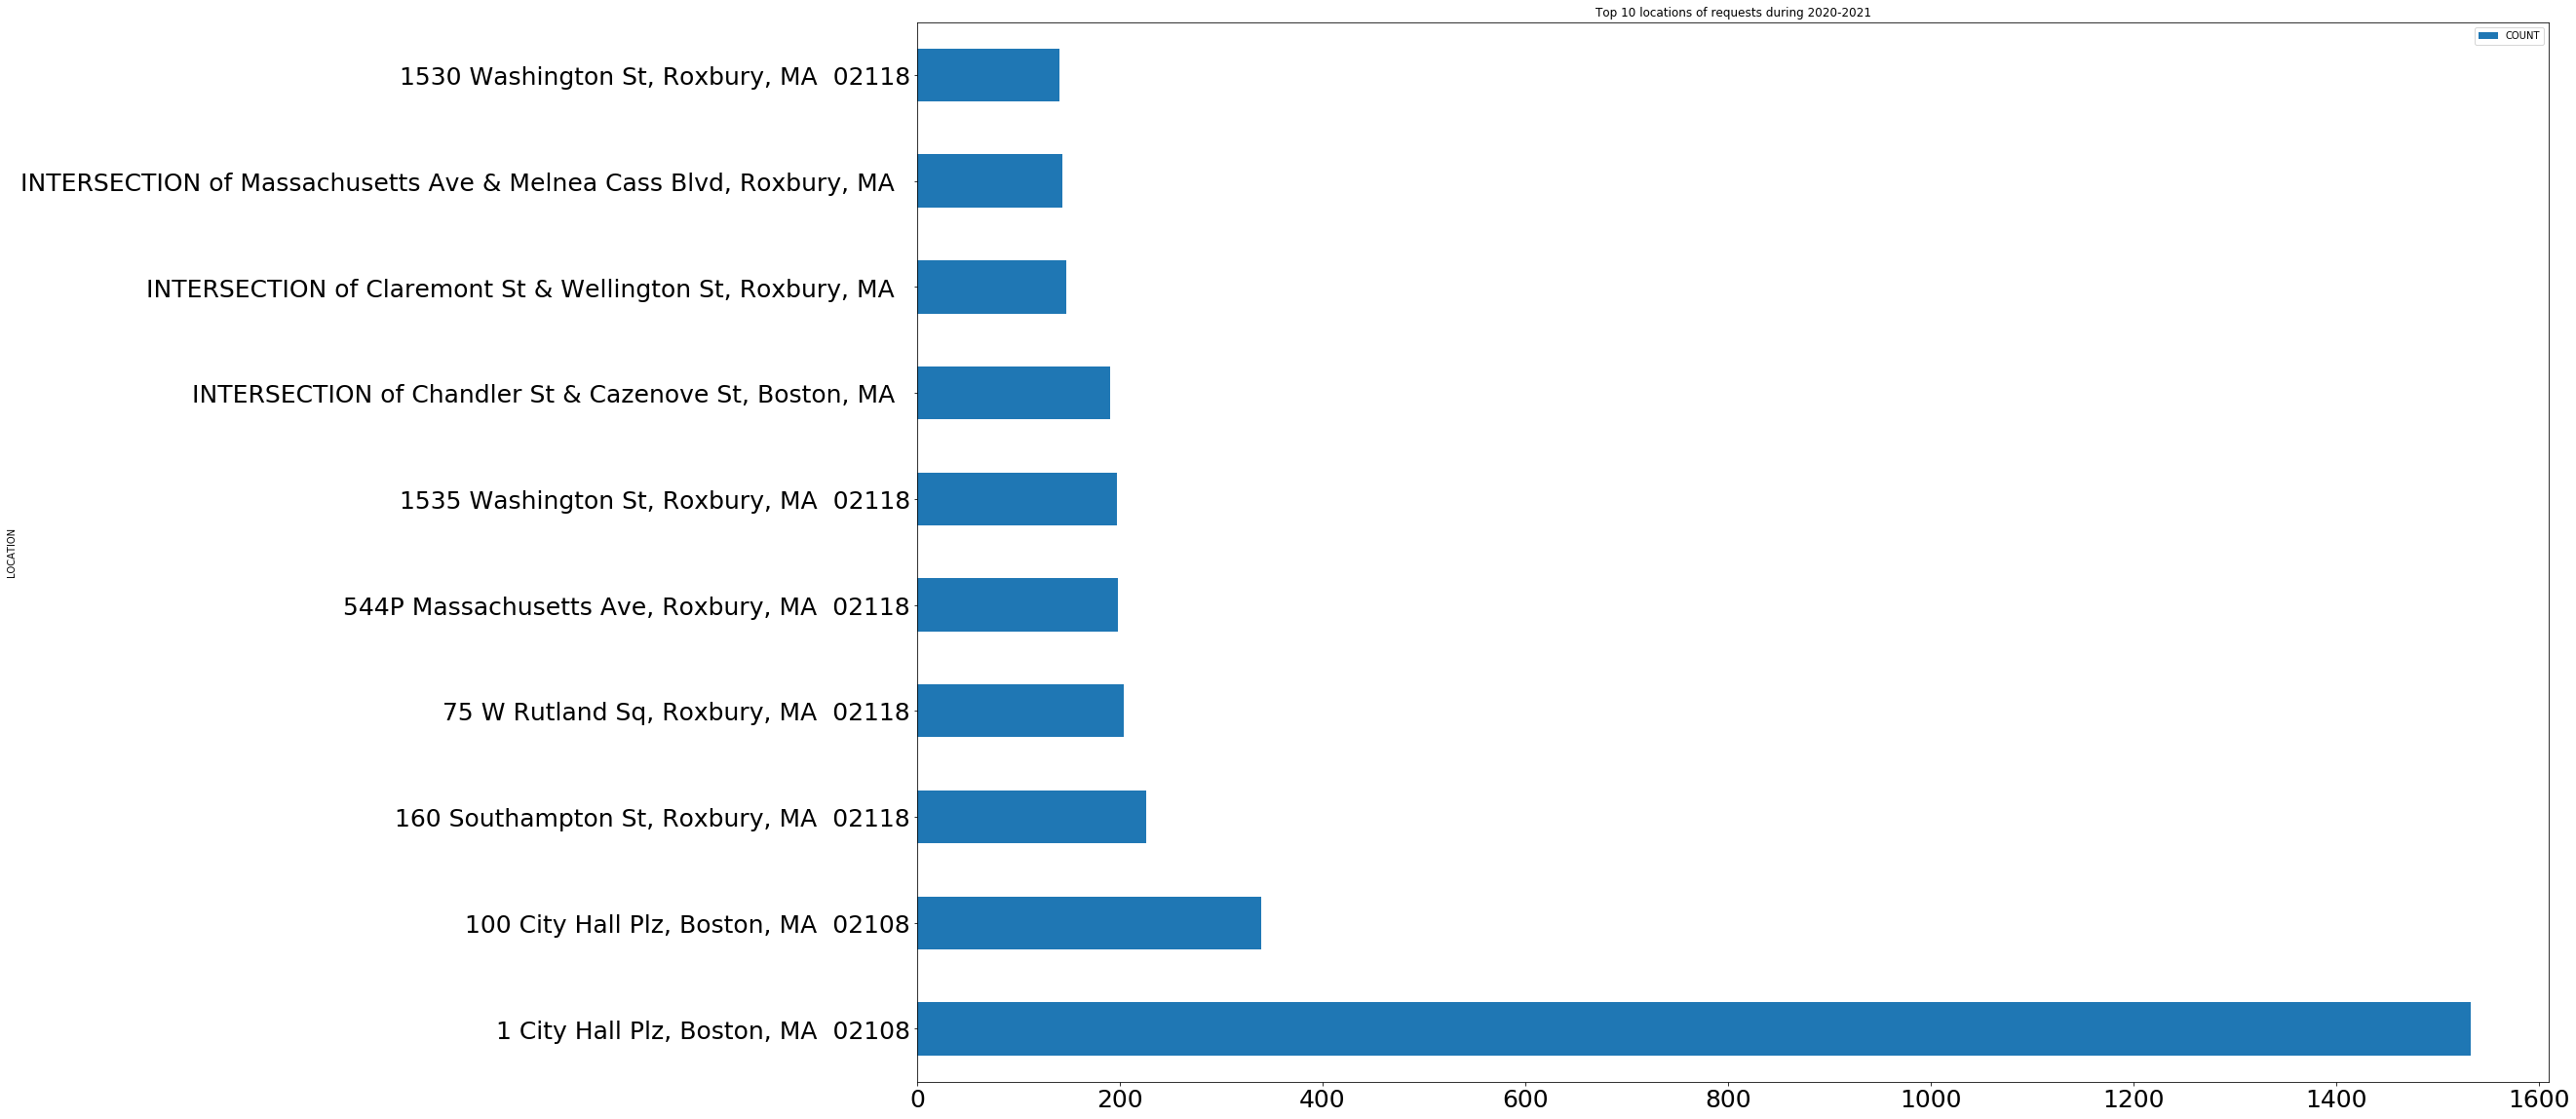

In [19]:
top_10_plot_post_covid = top_10_locations_post_covid.plot.barh(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 locations of requests during 2020-2021")

In [20]:
def get_season(month):
    seasons = {'SPRING': [3,4,5], 'SUMMER': [6,7,8], 'FALL': [9,10,11], 'WINTER': [12,1,2]}
    for season, months in seasons.items():
        if month in months:
            return season

post_covid_season = post_covid_records.copy()
pre_covid_records['OPEN_SEASON'] = pre_covid_records['OPEN_DT'].dt.month.apply(lambda entry : get_season(entry))
post_covid_records['OPEN_SEASON'] = post_covid_records['OPEN_DT'].dt.month.apply(lambda entry : get_season(entry))
# Another way of applying function to every entry of a column
# post_covid_records['SEASON'] = post_covid_records.apply(lambda row : get_season(row['OPEN_MONTH']), axis = 1)
# print(post_covid_records.iloc[0:11])
# print(post_covid_records.iloc[75000:75010])
# print(post_covid_records.iloc[150000:150011])
# print(post_covid_records.iloc[225000:225011])

In [21]:
pre_covid_season = group_and_count(pre_covid_records, 'OPEN_SEASON')
print("Complaints by Seasons during 2015-2019")
pre_covid_season

Complaints by Seasons during 2015-2019


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,378523,26.657469
1,SPRING,355632,25.045371
3,WINTER,349713,24.628526
0,FALL,336083,23.668634


In [22]:
#pre_covid_season = pre_covid_season.set_index('OPEN_SEASON')
#pre_covid_season_plot = pre_covid_season.plot.pie(y='Percentage', figsize=(10, 10))
post_covid_season = group_and_count(post_covid_records, 'OPEN_SEASON')
print("\nComplaints by Seasons during 2020-2021")
post_covid_season
# Observe that the 311 cases during SPRING 2020 dropped by a significant margin compared to SPRING 2015-2019
# This could be the reason behind increase of cases in SUMMER 2020 and FALL 2020


Complaints by Seasons during 2020-2021


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,90576,29.879757
0,FALL,80698,26.621142
3,WINTER,70095,23.123361
1,SPRING,61766,20.375740


Seasonal Distribution of 311 Calls


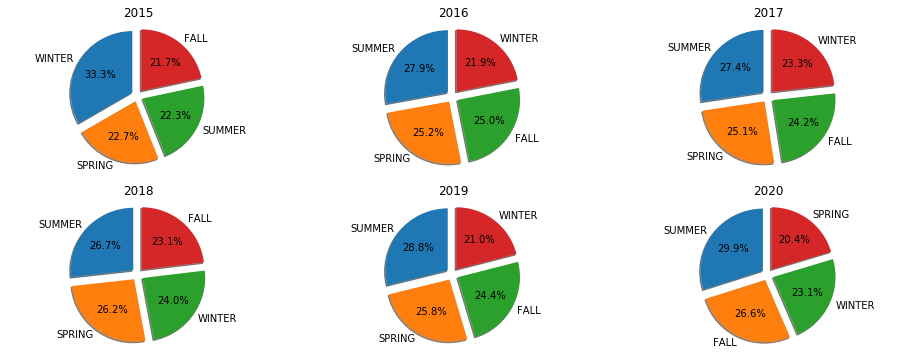

In [44]:
records_by_year = {}
for year in pre_covid_records['OPEN_DT'].dt.year.unique(): 
    records_by_year[year] = pre_covid_records[pre_covid_records['OPEN_DT'].dt.year == year]
    
for year in post_covid_records['OPEN_DT'].dt.year.unique():
    records_by_year[year] = post_covid_records[post_covid_records['OPEN_DT'].dt.year == year]

fig2, ((plot_2015, plot_2016, plot_2017), (plot_2018, plot_2019, plot_2020)) = plt.subplots(2,3,figsize=(16,6))

def fill_plot(records, sub_plot, title):
    labels = records['OPEN_SEASON']
    sizes = records['Percentage']
    explode = (0.1, 0.1, 0.1, 0.1)  # Seperates each slice of pie chart
    sub_plot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    sub_plot.axis('equal')  # Draw pie plot as perfect circle with constant radii
    sub_plot.set_title(title)

    
season_2015 = group_and_count(records_by_year[2015], 'OPEN_SEASON')
fill_plot(season_2015, plot_2015, '2015')
season_2016 = group_and_count(records_by_year[2016], 'OPEN_SEASON')
fill_plot(season_2016, plot_2016, '2016')
season_2017 = group_and_count(records_by_year[2017], 'OPEN_SEASON')
fill_plot(season_2017, plot_2017, '2017')
season_2018 = group_and_count(records_by_year[2018], 'OPEN_SEASON')
fill_plot(season_2018, plot_2018, '2018')
season_2019 = group_and_count(records_by_year[2019], 'OPEN_SEASON')
fill_plot(season_2019, plot_2019, '2019')
season_2020 = group_and_count(records_by_year[2020], 'OPEN_SEASON')
fill_plot(season_2020, plot_2020, '2020')

print('Seasonal Distribution of 311 Calls')
plt.show()

#### Hypothesis 2
Our second hypothesis that during the peak period of Covid, the frequency of calls per day reduced significantly is True since we can observe from the above graph that during Spring 2020, the frequency of calls reduced significantly compared to pre covid Spring seasons. 
